In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
# Let's me see what tables are in there, access using .keys (base.classes.keys())
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
columns_measurement = inspector.get_columns('measurement')
columns_station = inspector.get_columns('station')

In [9]:
m_column_names = []
for dictionary in columns_measurement : m_column_names.append(dictionary["name"])
m_column_names

['id', 'station', 'date', 'prcp', 'tobs']

In [10]:
s_column_names = []
for dictionary in columns_station : s_column_names.append(dictionary["name"])
s_column_names

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
last_date_string = session.query(measurement.date).all()[-1][0]
last_date_string

'2017-08-23'

In [13]:
last_date_string[8:]

'23'

In [14]:
one_year_ago = dt.date(int(last_date_string[0:4])-1,int(last_date_string[5:7]), int(last_date_string[8:]))

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
data_scores = session.query(measurement.date,measurement.prcp).filter(measurement.date>=one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_data = pd.DataFrame(data_scores).sort_values('date')
precip_data

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


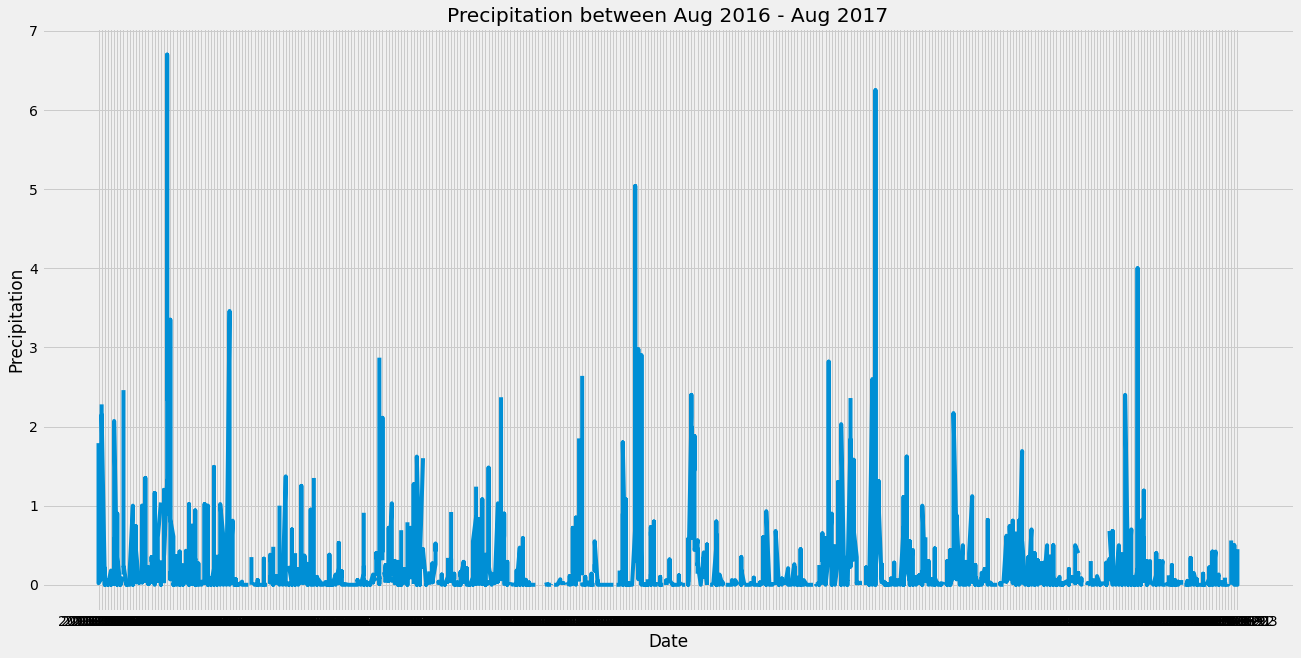

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,10))
plt.plot(precip_data['date'], precip_data['prcp'])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation between Aug 2016 - Aug 2017')
plt.show()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.id).count()
print(f'There are {station_count} stations.')

There are 9 stations.


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations
                 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_max = session.query(func.max(measurement.tobs)).filter(measurement.station =='USC00519281').all()
active_min = session.query(func.min(measurement.tobs)).filter(measurement.station =='USC00519281').all()
active_avg = session.query(func.avg(measurement.tobs)).filter(measurement.station =='USC00519281').all()
print(f'Lowest recorded temperature is {active_max[0]}.')
print(f'Lowest recorded temperature is {active_min[0]}.')
print(f'Lowest recorded temperature is {active_avg[0]}.')

Lowest recorded temperature is (85.0,).
Lowest recorded temperature is (54.0,).
Lowest recorded temperature is (71.66378066378067,).


In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(measurement.date,measurement.tobs).\
                    filter(measurement.station == 'USC00519281').\
                    filter(measurement.date > one_year_ago).all()
active_station_data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

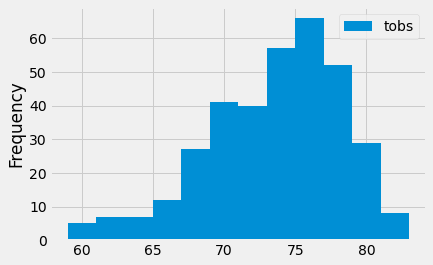

In [50]:
# Create dataframe of most active station data
active_station_df = pd.DataFrame(active_station_data)

# Plot histogram of dataframe
active_station_df.plot(kind='hist', bins = 12);

# Close session

In [51]:
# Close Session
session.close()